***Import Libraries***

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


***Load Dataset***

In [12]:

df = pd.read_csv("house_data_multicity.csv")
df.head()


Unnamed: 0  property_id  location_id  \
0           0       237062         3325   
1           1       346905         3236   
2           2       386513          764   
3           3       656161          340   
4           4       841645         3226   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   

      location       city      province_name   latitude  longitude  baths  \
0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
2         G-15  Islamabad  Islamabad Capital  33.631486  72.926559      6   
3    Bani Gala  Islamabad  Islamabad Capital  33.707573  73.151199      4   
4  DHA Defence  Islamabad  Islamabad Capital  33.492591  73.301339      3   

    purpose  bedrooms date_added         agency  \
0  For Sale         2   2/4/2019            NaN   
1  For Sale         3   5/4/2019            NaN   
2  For Sale         5  7/17/2019            NaN   
3  For Sale         4   4/5/2019            NaN   
4  For Sale         3  7/10/2019  Easy Property   

                                          agent  Total_Area  
0                                           NaN    1089.004  
1                                           NaN   15246.056  
2                                           NaN    2178.008  
3                                           NaN   10890.000  
4  Muhammad Junaid Ceo Muhammad Shahid Director    2178.008

***Data Cleaning & Preprocessing***

In [13]:
# Keep only relevant features
df = df[[
    "price", "bedrooms", "baths", "Total_Area", 
    "property_type", "location", "city", "province_name", 
    "latitude", "longitude"
]]

# Drop rows with missing or zero values in key columns
df.dropna(inplace=True)
df = df[(df["price"] > 0) & (df["Total_Area"] > 0)]

# Optional: remove outliers using quantiles
df = df[df["price"] < df["price"].quantile(0.99)]
df = df[df["Total_Area"] < df["Total_Area"].quantile(0.99)]


***Feature & Target Selection***

In [15]:
# Features and target
features = [
    "bedrooms", "baths", "Total_Area", 
    "latitude", "longitude", 
    "property_type", "location", "city", "province_name"
]
target = "price"

X = df[features]
y = df[target]
X,y

(        bedrooms  baths  Total_Area   latitude  longitude property_type  \
 0              2      2    1089.004  33.679890  73.012640          Flat   
 1              3      3   15246.056  33.700993  72.971492          Flat   
 2              5      6    2178.008  33.631486  72.926559         House   
 3              4      4   10890.000  33.707573  73.151199         House   
 4              3      3    2178.008  33.492591  73.301339         House   
 ...          ...    ...         ...        ...        ...           ...   
 168441         6      0   26136.096  25.029909  67.137192         House   
 168442         3      0    2178.008  25.017951  67.136393         House   
 168443         6      0   26136.096  25.015384  67.116330         House   
 168444         3      0   21235.578  25.013265  67.120818         House   
 168445         3      3   25591.594  25.113565  67.353811         House   
 
                    location       city      province_name  
 0                      G

***Preprocessing Pipeline***

In [19]:
# Define numeric and categorical features
num_features = ["bedrooms", "baths", "Total_Area", "latitude", "longitude"]
cat_features = ["property_type", "location", "city", "province_name"]

# Preprocessing with scaling and one-hot encoding
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])


***Train/Test Split***

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


***Model Pipelines***

In [21]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.05, random_state=42))
])


***Train Models***

In [24]:
# Fit models
lr_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'baths',
                                                   'Total_Area', 'latitude',
                                                   'longitude']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['property_type', 'location',
                                                   'city',
                                                   'province_name'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                                           random_state=42))])

***Evaluate Models***

In [25]:
def evaluate(model, X, y_true):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Linear Regression
mae_lr, rmse_lr = evaluate(lr_pipeline, X_test, y_test)
print(f"Linear Regression MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")

# Gradient Boosting
mae_gb, rmse_gb = evaluate(gb_pipeline, X_test, y_test)
print(f"Gradient Boosting MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}")


Linear Regression MAE: 10221891.67, RMSE: 16805360.85
Gradient Boosting MAE: 8310346.34, RMSE: 15121021.86


***Visualization of Predictions***

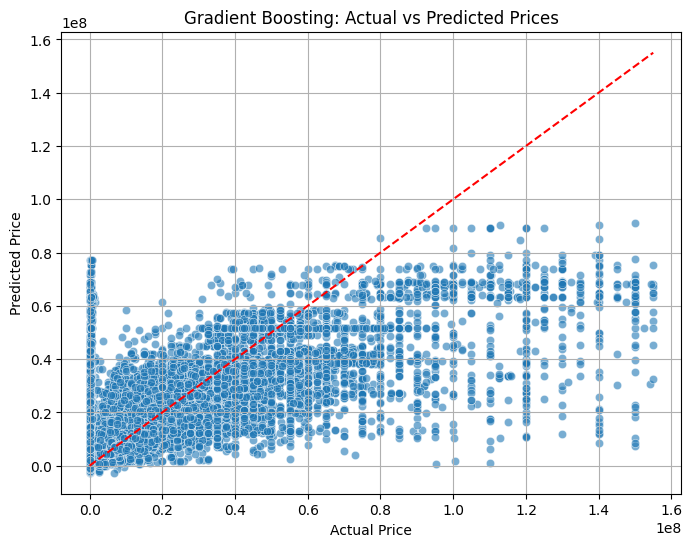

In [27]:
# Actual vs Predicted for Gradient Boosting
y_pred = gb_pipeline.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Actual vs Predicted Prices")
plt.grid(True)
plt.show()
